# Time Series Analysis and Forecasting with ARIMA Model

Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

1. Data Cleaning and Preparation

In [3]:
# Define column names
column_names = ['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
                'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']

# Load dataset specifying column names and skipping the first row
data = pd.read_csv('googleplaystore.csv', names=column_names, skiprows=1, encoding='utf-8')

# Convert 'Last Updated' to datetime format
data['Last Updated'] = pd.to_datetime(data['Last Updated'])

# Check column names
print(data.columns)

# Handle missing values
data.dropna(inplace=True)

# Remove duplicates
data.drop_duplicates(inplace=True)
# Drop duplicate rows based on the 'Last Updated' column
data.drop_duplicates(subset='Last Updated', inplace=True)
# Convert fields to numerical format
data['Reviews'] = pd.to_numeric(data['Reviews'], errors='coerce')
data['Size'] = data['Size'].str.replace('M', '').str.replace('k', '').apply(pd.to_numeric, errors='coerce')
data['Installs'] = data['Installs'].str.replace('+', '').str.replace(',', '').apply(pd.to_numeric, errors='coerce')
data['Price'] = data['Price'].str.replace('$', '').apply(pd.to_numeric, errors='coerce')



Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')


2. Exploratory Data Analysis (EDA)

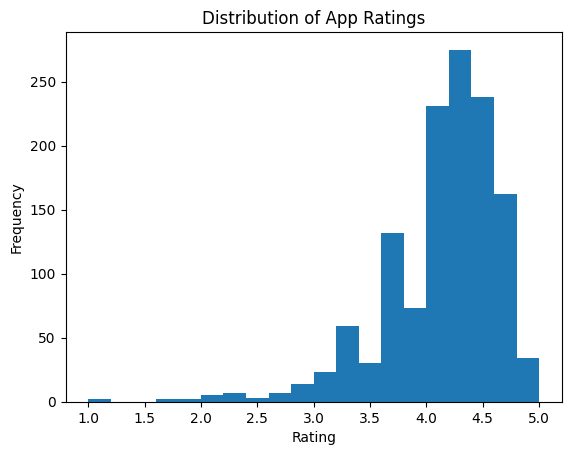

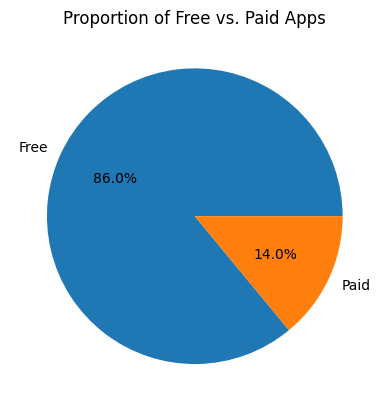

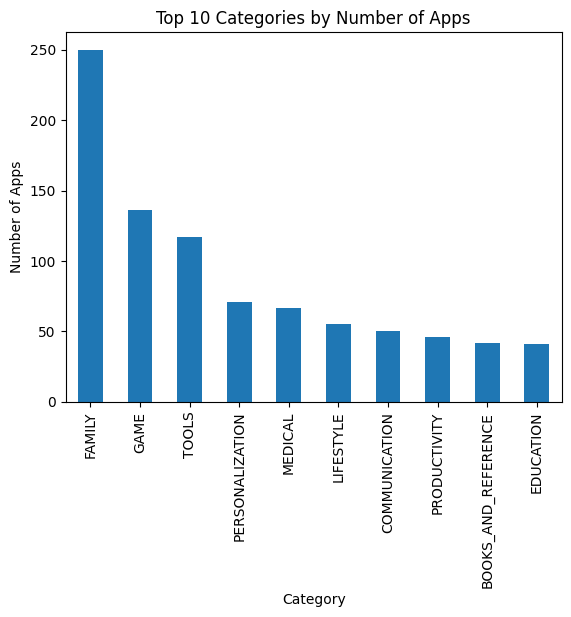

In [4]:
# Visualize distribution of app ratings
plt.hist(data['Rating'], bins=20)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of App Ratings')
plt.show()

# Analyze proportion of free vs. paid apps
free_apps = data[data['Type'] == 'Free']
paid_apps = data[data['Type'] == 'Paid']
free_vs_paid = [len(free_apps), len(paid_apps)]
labels = ['Free', 'Paid']
plt.pie(free_vs_paid, labels=labels, autopct='%1.1f%%')
plt.title('Proportion of Free vs. Paid Apps')
plt.show()

# Identify categories with the most apps
top_categories = data['Category'].value_counts().head(10)
top_categories.plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Number of Apps')
plt.title('Top 10 Categories by Number of Apps')
plt.show()

3. Category Analysis

Category with Highest Average Rating: FOOD_AND_DRINK


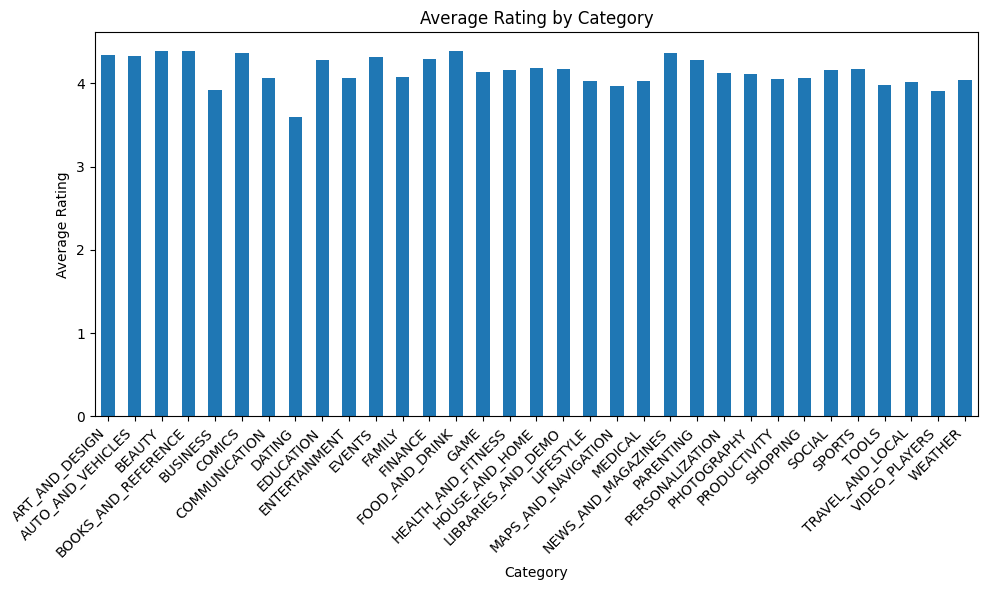

Category with Most Reviews: GAME


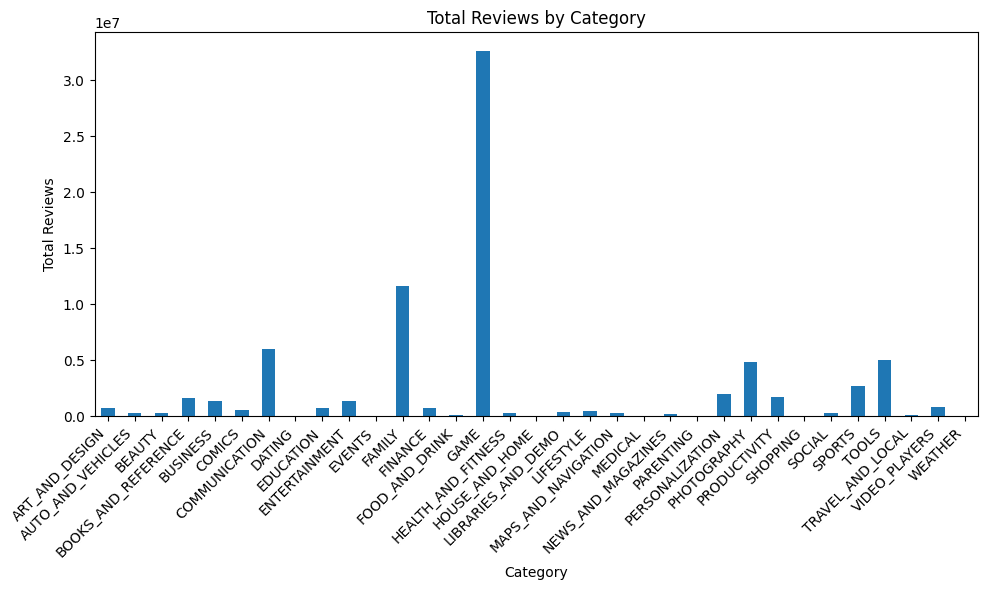

Category with Most Apps: FAMILY


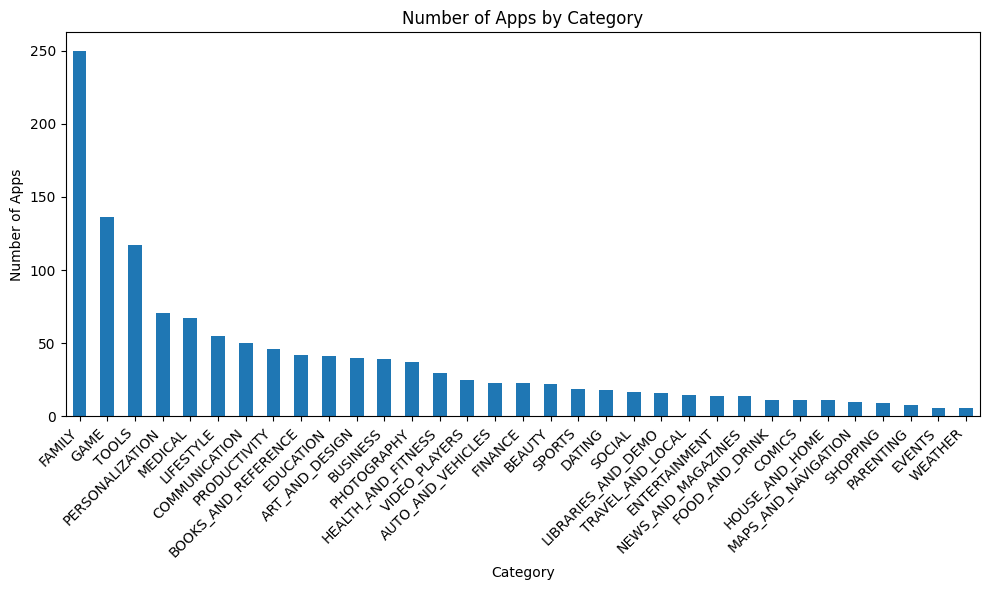

In [5]:
# Analyze category with highest average rating
avg_rating_by_category = data.groupby('Category')['Rating'].mean()
highest_avg_rating_category = avg_rating_by_category.idxmax()
print("Category with Highest Average Rating:", highest_avg_rating_category)

# Plot average ratings by category
plt.figure(figsize=(10, 6))
avg_rating_by_category.plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Average Rating')
plt.title('Average Rating by Category')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Analyze category with most reviews
most_reviews_category = data.groupby('Category')['Reviews'].sum().idxmax()
print("Category with Most Reviews:", most_reviews_category)

# Plot total reviews by category
total_reviews_by_category = data.groupby('Category')['Reviews'].sum()
plt.figure(figsize=(10, 6))
total_reviews_by_category.plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Total Reviews')
plt.title('Total Reviews by Category')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Additional: Analyze category with most apps
most_apps_category = data['Category'].value_counts().idxmax()
print("Category with Most Apps:", most_apps_category)

# Plot number of apps by category
num_apps_by_category = data['Category'].value_counts()
plt.figure(figsize=(10, 6))
num_apps_by_category.plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Number of Apps')
plt.title('Number of Apps by Category')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

4. Rating Prediction Model

In [6]:
# Split data into features (X) and target (y)
features = ['Reviews', 'Size', 'Installs', 'Price']
X = data[features]
y = data['Rating']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle missing values in the training features (X_train)
X_train.dropna(inplace=True)
y_train = y_train[X_train.index]  # Align y_train with X_train after removing NaNs

# Handle missing values in the testing features (X_test)
X_test.dropna(inplace=True)
y_test = y_test[X_test.index]  # Align y_test with X_test after removing NaNs

# Build model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.3289466217549039


5. Trend Analysis


Summary Statistics:
   Year    Rating        Reviews    Installs
0  2010  4.200000    1415.000000      100000
1  2011  3.966667   15720.000000    17407100
2  2012  3.785714   12872.523810    13990050
3  2013  4.029167   24610.083333    74565060
4  2014  4.072727   45475.681818   253211310
5  2015  4.064486   49594.070093   310694750
6  2016  4.055830   41476.865724   758072870
7  2017  4.129532   54120.564327   815776350
8  2018  4.267123  130612.799087  2148476200


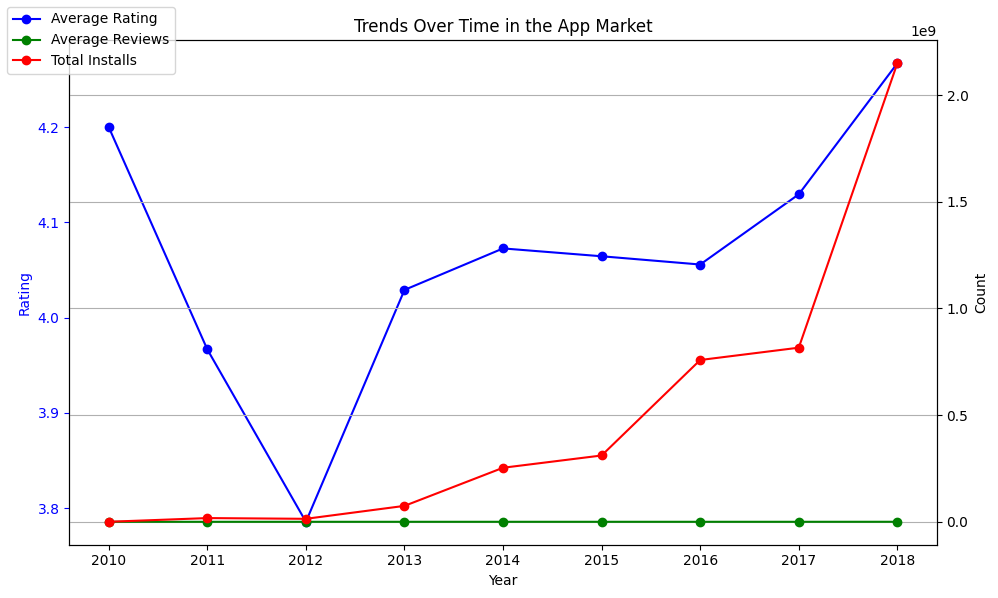

In [10]:
# Convert 'Last Updated' column to datetime format
data['Last Updated'] = pd.to_datetime(data['Last Updated'])

# Extract year and month from 'Last Updated' column
data['Year'] = data['Last Updated'].dt.year
data['Month'] = data['Last Updated'].dt.month

# Group by year and calculate mean rating, reviews, and installs
grouped_year = data.groupby('Year').agg({'Rating': 'mean', 'Reviews': 'mean', 'Installs': 'sum'}).reset_index()

# Print the summary statistics
print("Summary Statistics:")
print(grouped_year)

# Plot trends over time
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot rating
ax1.plot(grouped_year['Year'], grouped_year['Rating'], marker='o', label='Average Rating', color='blue')
ax1.set_xlabel('Year')
ax1.set_ylabel('Rating', color='blue')
ax1.tick_params('y', colors='blue')

# Create a second y-axis for reviews and installs
ax2 = ax1.twinx()
ax2.plot(grouped_year['Year'], grouped_year['Reviews'], marker='o', label='Average Reviews', color='green')
ax2.plot(grouped_year['Year'], grouped_year['Installs'], marker='o', label='Total Installs', color='red')
ax2.set_ylabel('Count', color='black')
ax2.tick_params('y', colors='black')

plt.title('Trends Over Time in the App Market')
fig.tight_layout()
fig.legend(loc='upper left')
plt.grid(True)
plt.show()

**Average Rating:**

The average rating of apps has ***generally increased*** over the years, reaching its ***peak in 2018*** with an average rating of approximately 4.27.
This indicates an overall improvement in the quality or user satisfaction with the apps available in the Google Play Store.

**Average Reviews:**

The average number of reviews per app has also shown an increasing trend over time.

This suggests a growing user base or engagement with the apps, as more users are providing feedback or reviews on the platform.

**Total Installs:**

The total number of installs has exhibited significant growth over the years, with a remarkable surge observed from 2016 onwards.
This indicates a booming app market with increasing demand and adoption of mobile applications among users.

The year 2018 stands out with a substantial increase in total installs, reflecting the rapid expansion of the app ecosystem during that period.

**Overall Trends:**

The trends suggest a positive trajectory for the app market, characterized by higher app ratings, increased user engagement (as indicated by the rising number of reviews), and expanding user base (reflected in the escalating total installs).

The years 2017 and 2018 particularly stand out as pivotal periods marked by significant growth in app ratings, reviews, and installs.

 6. Impact of Reviews on Ratings

Correlation between Reviews and Rating: 0.09118266627349485


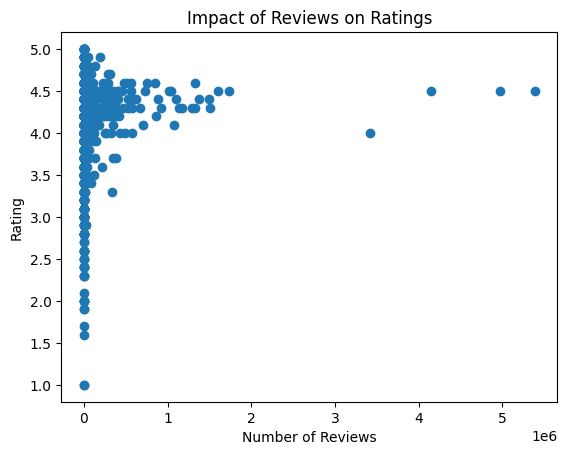

In [8]:
# Calculate correlation between number of reviews and app rating
correlation = data['Reviews'].corr(data['Rating'])
print("Correlation between Reviews and Rating:", correlation)

# Visualize relationship between reviews and ratings
plt.scatter(data['Reviews'], data['Rating'])
plt.xlabel('Number of Reviews')
plt.ylabel('Rating')
plt.title('Impact of Reviews on Ratings')
plt.show()

The correlation coefficient between the number of reviews and the app ratings is approximately 0.09. This value indicates a very weak positive relationship between the two variables. In other words, as the number of reviews increases, there is a slight tendency for the app ratings to also increase, but the relationship is very minimal.